In [1]:
import csv
import IPython
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import pydot  #pydot可以直接可视化出来决策树的模型
import pyparsing #可以被用来解析简单的名字字符串或代数表达式,同时也可以从复杂格式文本报告中提取数据
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree, datasets
#定义矩阵展示函数
def display(array):        
    m = Matrix(array).applyfunc(lambda x: round(x, 3))
    return m

In [5]:
#column_names  = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun",
#                 "minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=column_names)
#voice = pd.read_csv(r"data\voice.csv",names=column_names)
#voice.tail()
#X=np.array(voice.iloc[1:,0:20])
#y=np.array(voice.loc[1:,"label"])

with open('data/voice.csv', 'r') as csvfile:
    voice = csv.reader(csvfile, delimiter=',', quotechar='"')
    voice_X=[]
    voice_y=[]
    for row in voice:
        voice_X.append(row[0:20])
        voice_y.append(row[20])
    feature_names = np.array(voice_X[0])
    voice_X=np.array(voice_X[1:])
    voice_y=np.array(voice_y[1:])
print ("voice_X的大小为：",voice_X.shape,"; voice_y的大小为：", voice_y.shape,'\n')
print("Voice共有"+str(feature_names.shape[0])+"个属性。",'\n','\n',"Voice的属性如下：",'\n',feature_names)

voice_X的大小为： (3168, 20) ; voice_y的大小为： (3168,) 

Voice共有20个属性。 
 
 Voice的属性如下： 
 ['meanfreq' 'sd' 'median' 'Q25' 'Q75' 'IQR' 'skew' 'kurt' 'sp.ent' 'sfm'
 'mode' 'centroid' 'meanfun' 'minfun' 'maxfun' 'meandom' 'mindom' 'maxdom'
 'dfrange' 'modindx']


In [7]:
voice_X

array([[-4.04924806,  0.42735532, -4.22490078, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105326,  0.61166951, -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306646,  1.60384791, -4.09585051, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877325,  2.32272353, -0.05197278, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772848, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087874, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

## 标准化处理

In [6]:
voice_X = voice_X.astype(np.float)#先把字符串变成浮点数
zscore = preprocessing.StandardScaler()
voice_X = zscore.fit_transform(voice_X)

## 前3000条 用于训练，余下用于测试

In [4]:
X_train=np.array(voice_X[0:3000])
y_train=np.array(voice_y[0:3000])
print ("X_train的大小为：",X_train.shape,"; y_train的大小为：", y_train.shape,'\n')
X_test=np.array(voice_X[3000:])
y_test=np.array(voice_y[3000:])
print ("X_test的大小为：",X_test.shape,"; y_test的大小为：", y_test.shape,'\n')
y_test

X_train的大小为： (3000, 20) ; y_train的大小为： (3000,) 

X_test的大小为： (168, 20) ; y_test的大小为： (168,) 



array(['female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'fema

## 检查是否有空值

In [5]:
count=np.zeros(20)
for i in range(X_train.shape[0]):
    for j in range(feature_names.shape[0]):
        if X_train[i][j]=='NA': count1[j]+=1
print(count)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


均为0！没有空值，无需处理！

## 检查是否有异常值

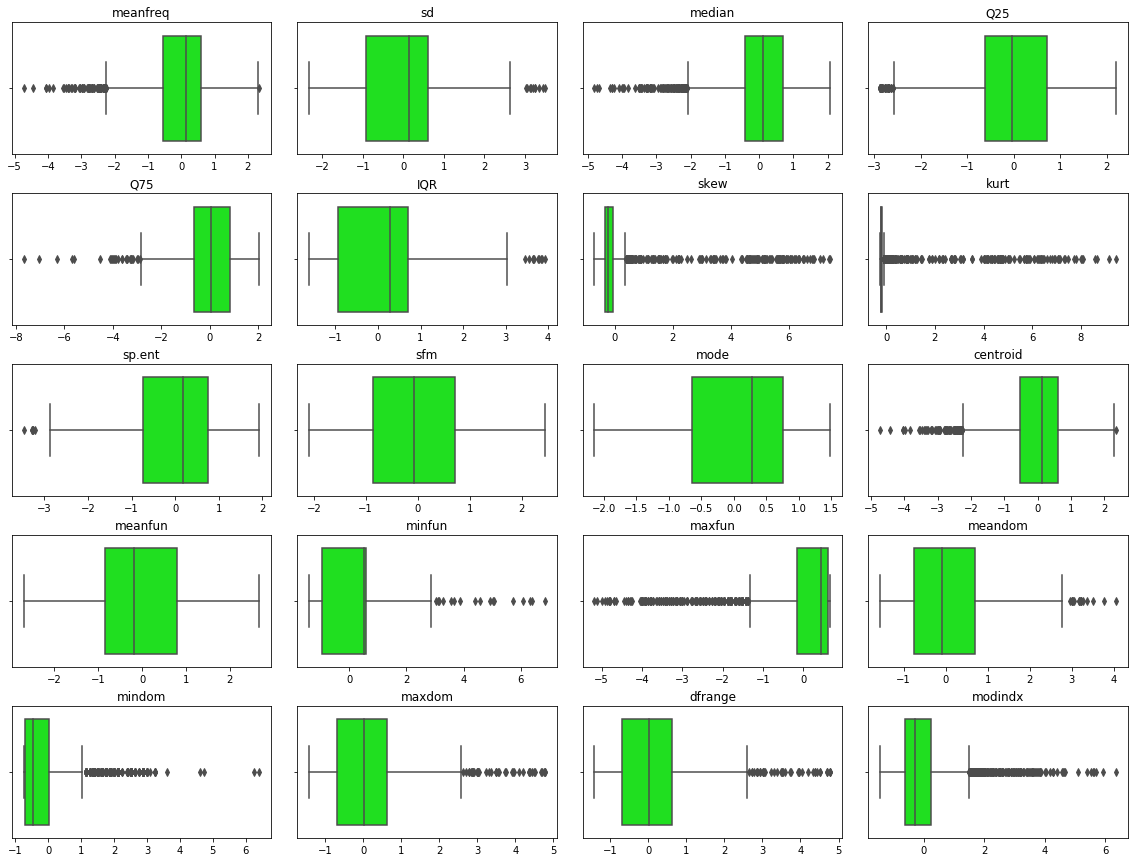

In [6]:
#X_train = X_train.astype(np.float);X_test= X_test.astype(np.float)
fig=plt.figure()
fig.set_size_inches(20,15)
plt.subplots_adjust(wspace=0.1, hspace=0.3)  
for i in range(len(feature_names)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(x=X_train[:,i], color='lime')
    plt.title(feature_names[i])

异常值还挺多

## 将标签信息(男，女)转化为数值 y-train--> y_trans

In [7]:
enc = LabelEncoder()
label_encoder = enc.fit(y_train) 
y_trans = label_encoder.transform(y_train)
label_encoder = enc.fit(y_test) # 
ytest_trans = label_encoder.transform(y_test)
print(y_trans)

[1 1 1 ... 0 0 0]


## 3000条训练数据中，清除任意属性有异常值的记录 得到 x_clear,y_clear

In [8]:
Normal=np.zeros((len(feature_names),2))
for i in range(len(feature_names)):
    Normal[i][0]=X_train[:,i].mean() - X_train[:,i].std()*3
    Normal[i][1]=X_train[:,i].mean() + X_train[:,i].std()*3

Num=np.zeros((1,len(feature_names)),dtype=int);Abn=[]
x_clear=X_train.copy()
y_clear=y_trans.copy()
for i in range(X_train.shape[0]):
    for j in  range(len(feature_names)):
        if X_train[i][j]<Normal[j][0] or X_train[i][j]>Normal[j][1]:
            Num[0][j]+=1
            if not i in Abn:
                Abn.append(i)
x_clear=np.delete(x_clear,Abn,axis=0) #干净的数据 没有异常值
y_clear=np.delete(y_clear,Abn,axis=0)
print("共有",len(Abn),"条异常数据。余下纯净数据共",x_clear.shape[0],"条。",'\n',"各属性下的异常数据条数如下：",'\n')
Num_pd=pd.DataFrame(Num,columns=feature_names)
Num_pd

共有 377 条异常数据。余下纯净数据共 2623 条。 
 各属性下的异常数据条数如下： 



,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,22,10,37,0,26,11,95,87,6,0,0,22,0,24,95,13,49,27,28,69


## 决策树分析

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
clf = clf.fit(x_clear,y_clear)

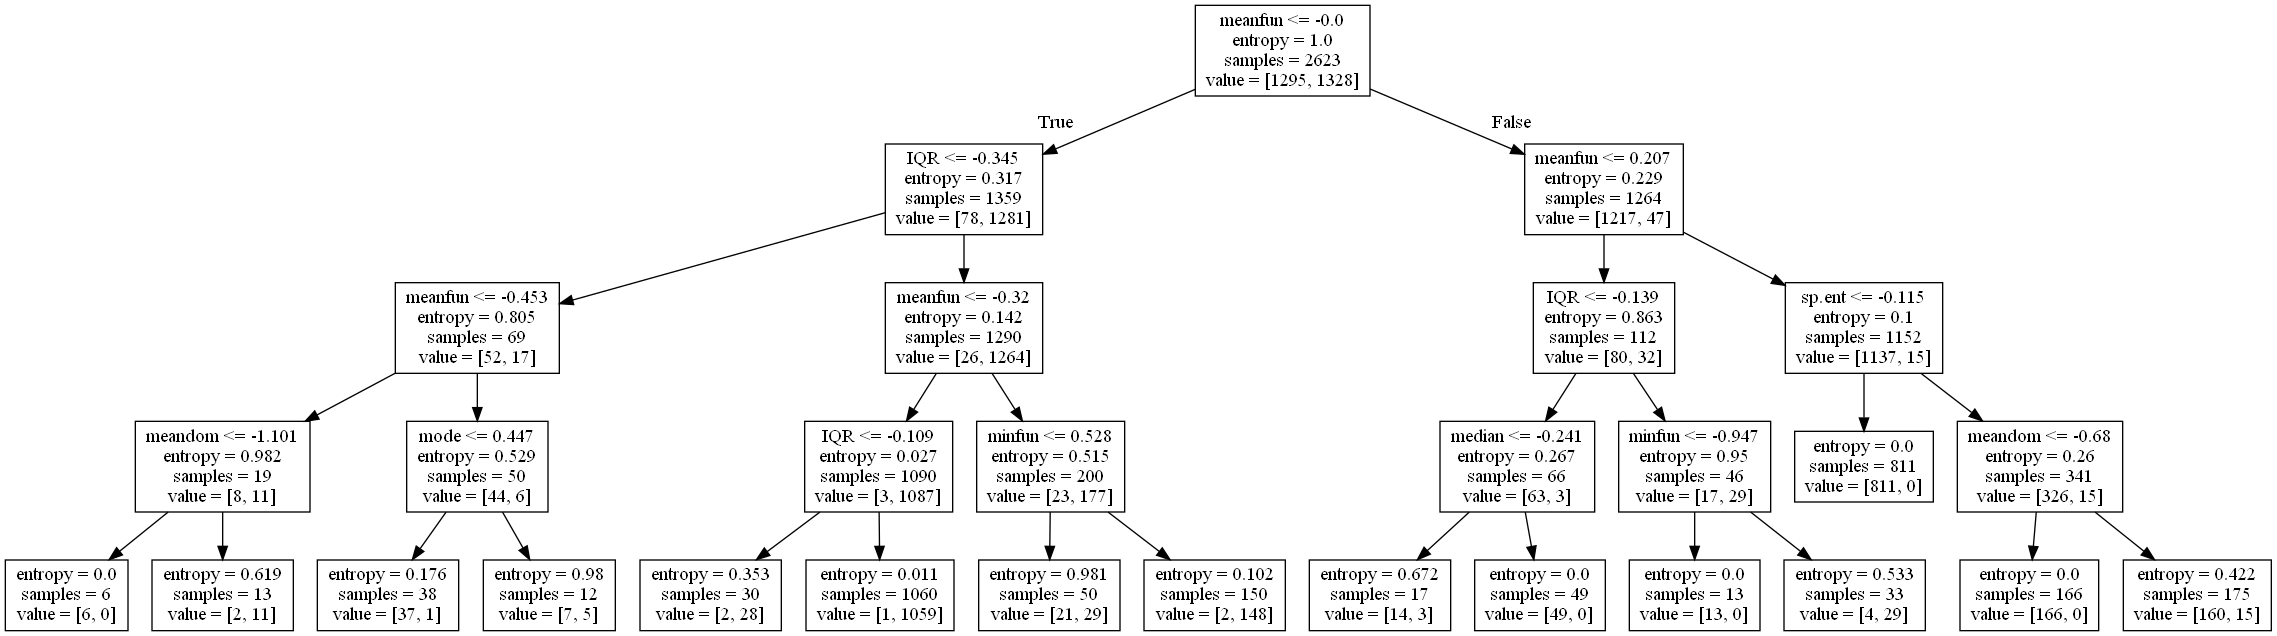

In [10]:
import io
# 生成 StringIO 对象
dot_data = io.StringIO() 
# 导出绘图数据到 dot_data
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_names) 
# 转换为图形
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
# 安装pydot和Graphviz时后将Graphviz2.38添加到环境变量中，添加环境变量的代码如下：
import os
os.environ['PATH'] = os.environ['PATH'] + (';C:\\Program Files\\Graphviz\\bin')
# 保存图片
graph.write_png(r'voice.png') 
# 加载图形
from IPython.core.display import Image 
Image(filename='voice.png')

### 定义测试函数

In [11]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")      
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

### 训练集精度得分

In [12]:
# 输出精度得分
measure_performance(x_clear, y_clear, clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.979 

Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1295
           1       0.98      0.98      0.98      1328

    accuracy                           0.98      2623
   macro avg       0.98      0.98      0.98      2623
weighted avg       0.98      0.98      0.98      2623
 

Confusion matrix
[[1263   32]
 [  24 1304]] 



### 测试集精度得分

In [13]:
measure_performance(X_test, ytest_trans, clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.970 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       168
           1       0.00      0.00      0.00         0

    accuracy                           0.97       168
   macro avg       0.50      0.49      0.49       168
weighted avg       1.00      0.97      0.98       168
 

Confusion matrix
[[163   5]
 [  0   0]] 



C:\Users\solit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\solit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\solit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 随机森林算法

In [14]:

#x_f=x_clear[:,5:13:7]
# 导入随机森林模型
from sklearn.ensemble import RandomForestClassifier
# 设定森林中有10棵树
forest = RandomForestClassifier(n_estimators = 10, random_state = 3 )
# 使用模型拟合数据
wald=forest.fit(x_clear, y_clear)

### 训练集精度得分

In [15]:
# 输出精度得分
measure_performance(x_clear, y_clear, wald, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.998 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1295
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      2623
   macro avg       1.00      1.00      1.00      2623
weighted avg       1.00      1.00      1.00      2623
 

Confusion matrix
[[1295    0]
 [   6 1322]] 



### 测试集精度得分

In [16]:
measure_performance(X_test, ytest_trans, wald, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.982 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       168
           1       0.00      0.00      0.00         0

    accuracy                           0.98       168
   macro avg       0.50      0.49      0.50       168
weighted avg       1.00      0.98      0.99       168
 

Confusion matrix
[[165   3]
 [  0   0]] 



C:\Users\solit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\solit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\solit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 结果分析：以上采用了所有的参数，分别用了4层的决策树和10棵的随机森林对辨别声音的性别进行了训练，发现：一般情况下，随机森林结果要好于决策树，因为随机森林是利用多个决策树共同决断的结果。

## 挑选重要参数
### 观察决策树的决策过程，发现决策时利用的属性按照重要性由高到低依次为：
* Meanfun, IQR；
* sp.ent；
* mode, minfun, meandom, median
### 故采用最为重要的两个属性（Meanfun, IQR）进行随机森林训练
#### 注意：重要性依据是属性出现在决策树的决策结点中的频率以及其所在结点的地位（根部节点，末端结点）

### 3000条训练数据中，只需清除Meanfun, IQR属性有异常值的记录 得到 x_wald2,y_wald2

In [17]:
x_wald=X_train.copy()
y_wald=y_trans.copy()
feature_new=['meanfun', 'IQR']
feature_num=np.zeros(2,dtype=int)
for i in  range(len(feature_new)):
    for j in  range(len(feature_names)):
        if feature_new[i]== feature_names[j]:
            feature_num[i]=j
print('feature_num:',feature_num)
Num2=np.zeros((1,len(feature_new)),dtype=int);Abn2=[]
for i in range(X_train.shape[0]):
    for j in  range(len(feature_new)):
        k=feature_num[j]
        if X_train[i][k] < Normal[k][0] or X_train[i][k] > Normal[k][1]:
            Num2[0][j]+=1
            if not i in Abn2:
                Abn2.append(i)
x_wald2=np.delete(x_wald,Abn2,axis=0) #干净的数据 没有异常值
y_wald2=np.delete(y_wald,Abn2,axis=0)
print("共有",len(Abn2),"条异常数据。余下纯净数据共",x_wald2.shape[0],"条。",'\n',"各属性下的异常数据条数如下：",'\n')
Num_pd2=pd.DataFrame(Num2,columns=feature_new)
Num_pd2

feature_num: [12  5]
共有 11 条异常数据。余下纯净数据共 2989 条。 
 各属性下的异常数据条数如下： 



,meanfun,IQR
0,0,11


In [19]:
y_wald

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
Abn2

[1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 2029]

### 训练并得到训练集精度得分
#### 利用挑选的最为重要的两个属性，进行随机森林训练

In [36]:
del_name=np.arange(0,20,1,dtype=int) 
del_name=np.delete(del_name,feature_num,axis=0)
X_wald2=np.delete(x_wald2,del_name,axis=1)
X_Test=np.delete(X_test,del_name,axis=1)
# 设定森林中有16棵树
forest = RandomForestClassifier(n_estimators = 16, random_state = 3 )
# 使用模型拟合数据
wald2=forest.fit(X_wald2, y_wald2)
measure_performance(X_wald2, y_wald2, wald2, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.997 

Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1405
           1       1.00      0.99      1.00      1584

    accuracy                           1.00      2989
   macro avg       1.00      1.00      1.00      2989
weighted avg       1.00      1.00      1.00      2989
 

Confusion matrix
[[1404    1]
 [   8 1576]] 



### 测试集精度得分

In [37]:
measure_performance(X_Test, ytest_trans, wald2, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.982 

Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       168
           1       0.00      0.00      0.00         0

    accuracy                           0.98       168
   macro avg       0.50      0.49      0.50       168
weighted avg       1.00      0.98      0.99       168
 

Confusion matrix
[[165   3]
 [  0   0]] 



C:\Users\solit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### 可视化 （测试集）

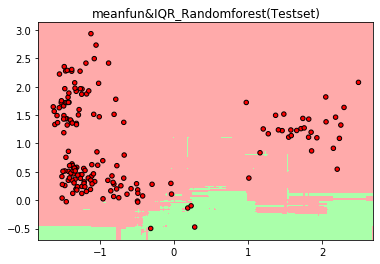

In [40]:
# 定义图像中分区颜色
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
# 分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_Test[:,0].min()-0.2 ,  X_Test[:,0].max()+0.2
y_min, y_max = X_Test[:,1].min()-0.2 ,  X_Test[:,1].max()+0.2
xx,yy = np.meshgrid(np.arange(x_min, x_max,0.001),
                   np.arange(y_min, y_max, 0.001))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])
# 给每个分类的样本分析不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
#用散点把样本表示出来
plt.scatter(X_Test[:,0], X_Test[:,1],c=ytest_trans,  cmap=cmap_bold, edgecolor = 'k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("meanfun&IQR_Randomforest(Testset)")
plt.show()

## 总结
#### 本题的总体解题思路是先利用决策树训练，通过观察决策树各个节点所利用的属性，挑选出最为重要的节点，然后仅需利用重要的属性（本题中的meanfun，IQR），进行随机森林训练，即可得到较为不错的结果。因为一般情况下，随机森林是利用多个决策树共同决断的结果，效果一般比单个决策树要好。